# EN3160 Assignment 1 — Intensity Transformations & Neighborhood Filtering

**Author:** _Kumarage R.V. 220343B_

In [9]:
import os, numpy as np, cv2, matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append(str(Path('..')/ 'src'))
from utils import *

RAW = Path('..') / 'data' / 'raw'
PROC = Path('..') / 'data' / 'processed'
FIGS = Path('..') / 'figures'
PROC.mkdir(parents=True, exist_ok=True)
FIGS.mkdir(parents=True, exist_ok=True)
print('Paths set:', RAW, PROC, FIGS)

Paths set: ..\data\raw ..\data\processed ..\figures


## Task 1 – Intensity Transformation (Fig. 1a on Fig. 1b)

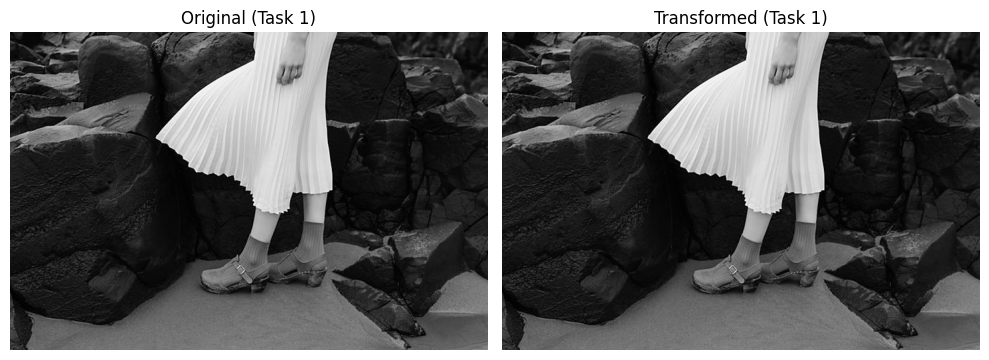

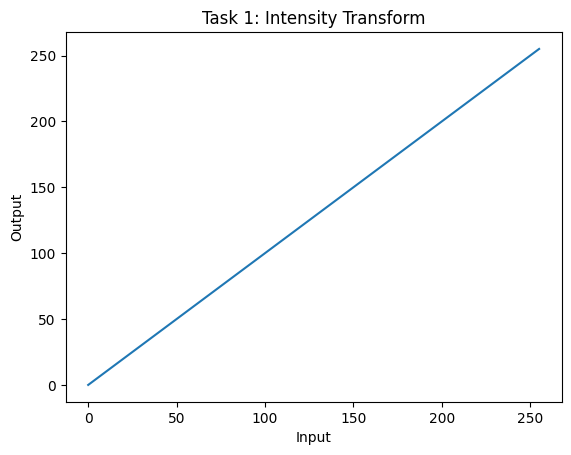

<Figure size 640x480 with 0 Axes>

In [15]:
# TODO: set the filename
img1_path = RAW / "highlights_and_shadows.jpg"  # <-- change to actual filename
img = imread_gray(str(img1_path))

# Build LUT from the given curve in Fig.1a. Example below is a placeholder (linear):
x = np.arange(256)
lut = x.copy()  # TODO: replace with your mapped values from Fig.1a

out = apply_lut(img, lut)

# Show original and transformed images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original (Task 1)')
axs[0].axis('off')
axs[1].imshow(out, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Transformed (Task 1)')
axs[1].axis('off')
plt.tight_layout()
plt.show()

# Plot LUT curve
plt.plot(x, lut); plt.title('Task 1: Intensity Transform'); plt.xlabel('Input'); plt.ylabel('Output'); plt.show()

save_image_gray(str(PROC / 'task1_out.png'), out)
plt.savefig(str(FIGS / 'task1_lut.png'))

## Task 2 – Accentuation of white & gray matter (Fig. 2)

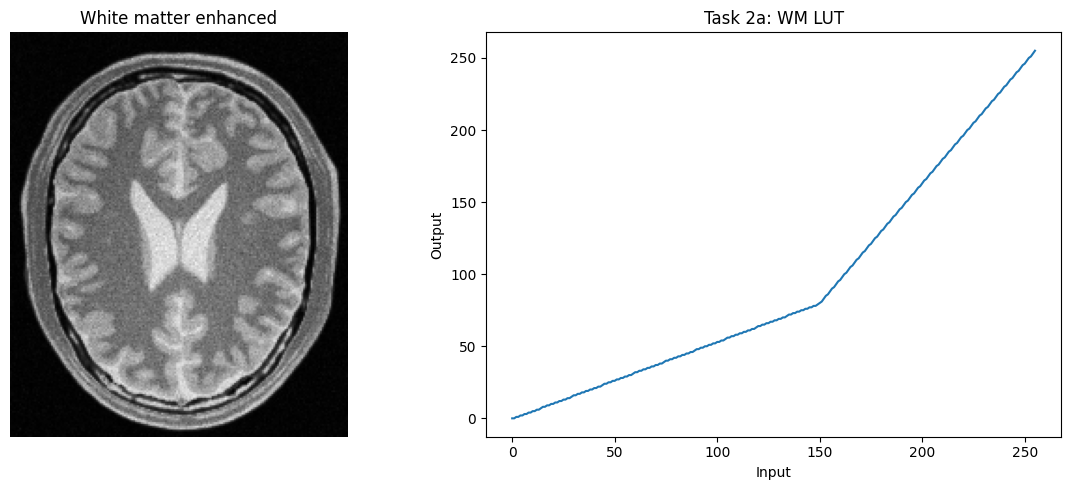

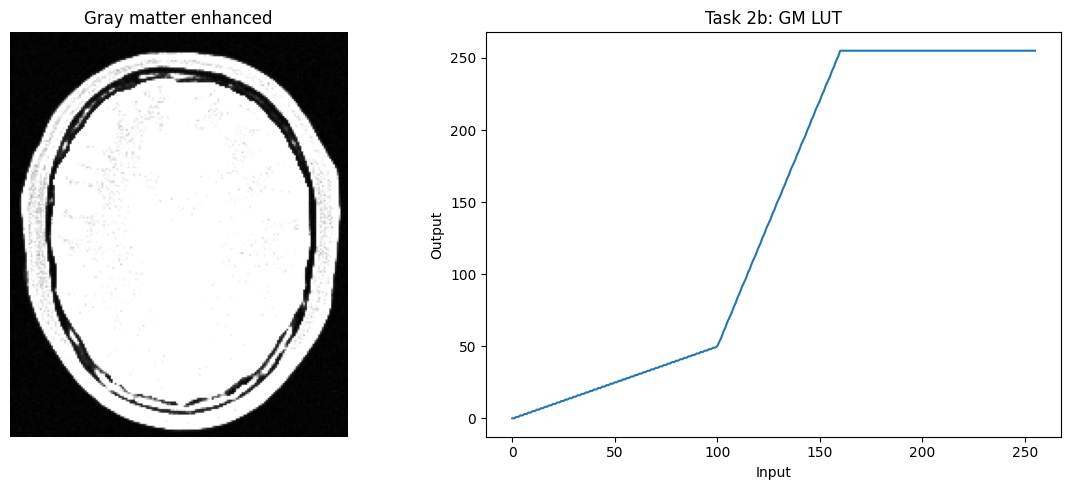

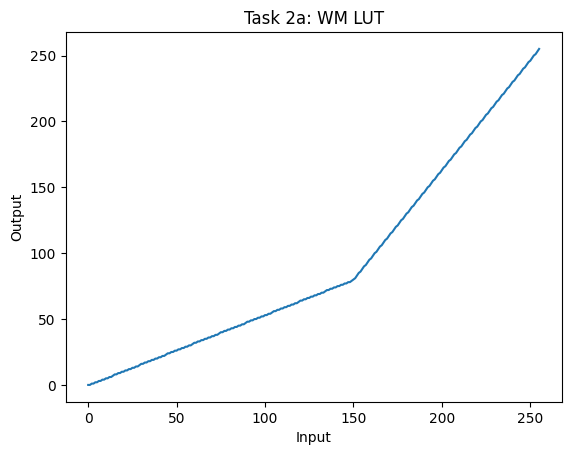

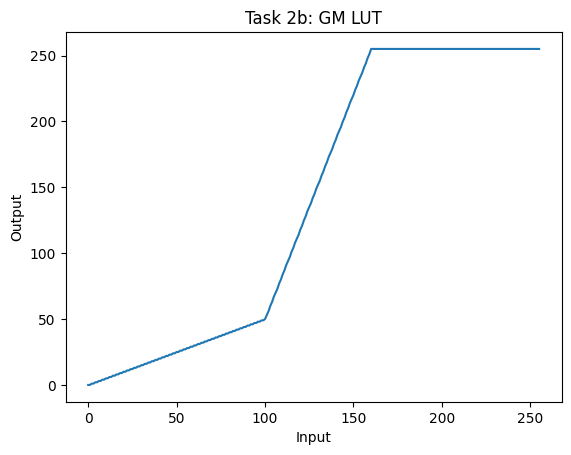

In [24]:
mri_path = RAW / 'brain_proton_density_slice.png'  # <-- change if needed
mri = imread_gray(str(mri_path))
x = np.arange(256)

# White matter ~ [150,255]
lut_white = np.zeros(256, dtype=np.uint8)
white_low, white_high = 150, 255
lut_white[:white_low] = np.linspace(0, 80, white_low, endpoint=False)
lut_white[white_low:white_high+1] = np.linspace(80, 255, white_high - white_low + 1)

wm = apply_lut(mri, lut_white)

# Gray matter ~ [100,160]
lut_gray = np.zeros(256, dtype=np.uint8)
gray_low, gray_high = 100, 160
lut_gray[:gray_low] = np.linspace(0, 50, gray_low, endpoint=False)
lut_gray[gray_low:gray_high+1] = np.linspace(50, 255, gray_high - gray_low + 1)
lut_gray[gray_high+1:] = 255

gm = apply_lut(mri, lut_gray)

# Show white matter enhanced image side by side with LUT curve
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(wm, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('White matter enhanced')
axs[0].axis('off')
axs[1].plot(x, lut_white)
axs[1].set_title('Task 2a: WM LUT')
axs[1].set_xlabel('Input')
axs[1].set_ylabel('Output')
plt.tight_layout()
plt.show()

# Show gray matter enhanced image side by side with LUT curve
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(gm, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Gray matter enhanced')
axs[0].axis('off')
axs[1].plot(x, lut_gray)
axs[1].set_title('Task 2b: GM LUT')
axs[1].set_xlabel('Input')
axs[1].set_ylabel('Output')
plt.tight_layout()
plt.show()

# Save outputs
save_image_gray(str(PROC / 'task2_white.png'), wm)
save_image_gray(str(PROC / 'task2_gray.png'), gm)

# Save LUT figures
plt.figure()
plt.plot(x, lut_white)
plt.title('Task 2a: WM LUT')
plt.xlabel('Input')
plt.ylabel('Output')
plt.savefig(str(FIGS / 'task2_wm_lut.png'))

plt.figure()
plt.plot(x, lut_gray)
plt.title('Task 2b: GM LUT')
plt.xlabel('Input')
plt.ylabel('Output')
plt.savefig(str(FIGS / 'task2_gm_lut.png'))

## Task 3 – Gamma correction on L* (Lab) + histograms

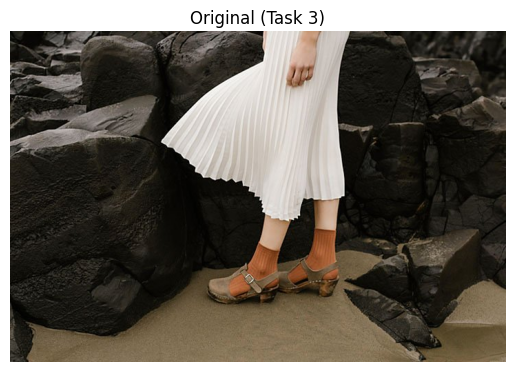

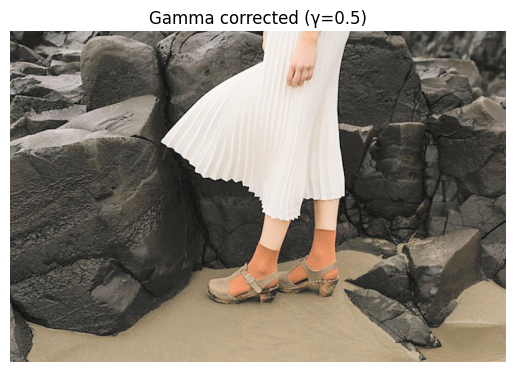

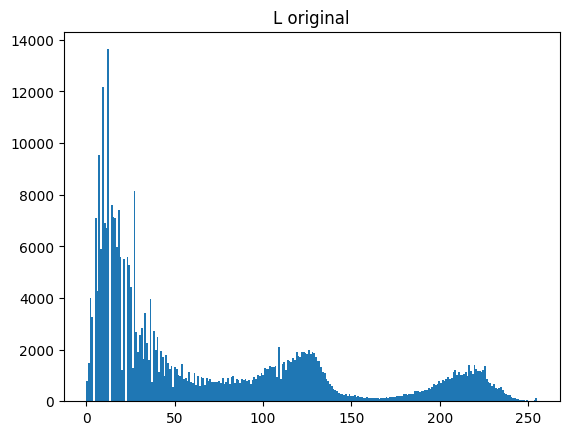

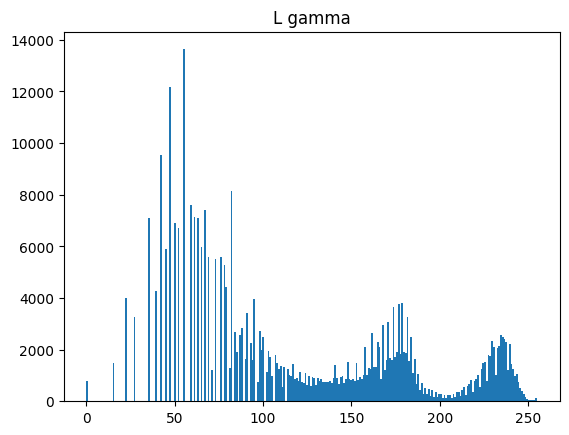

In [26]:
img3_path = RAW / 'highlights_and_shadows.jpg'  # <-- change to actual filename
img3 = imread_color(str(img3_path))
gamma = 0.5  # tune as needed
out3, L_orig, L_gamma = gamma_correction_lab(img3, gamma=gamma)
show_rgb(img3, f'Original (Task 3)')
show_rgb(out3, f'Gamma corrected (γ={gamma})')
plt.figure(); plt.title('L original'); plt.hist(L_orig.ravel(), bins=256, range=(0,255)); plt.show()
plt.figure(); plt.title('L gamma'); plt.hist(L_gamma.ravel(), bins=256, range=(0,255)); plt.show()
save_image_rgb(str(PROC / 'task3_out.png'), out3)

## Task 4 – Vibrance enhancement (on S in HSV)

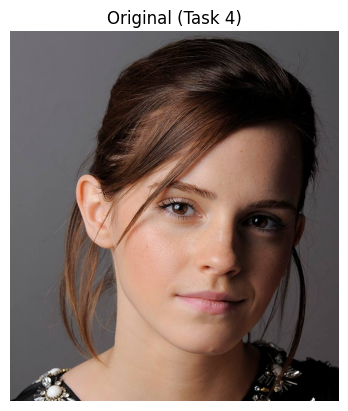

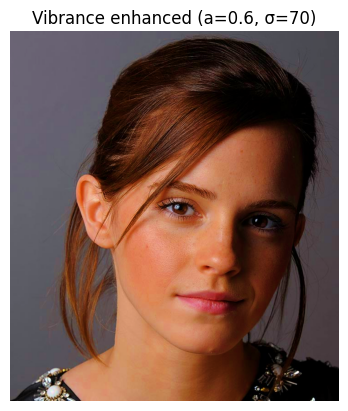

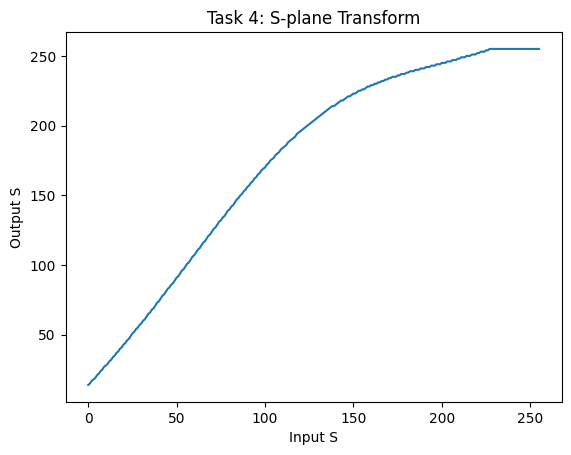

<Figure size 640x480 with 0 Axes>

In [28]:
img4_path = RAW / 'emma.jpg'  # <-- change to actual filename
img4 = imread_color(str(img4_path))
a = 0.6   # tune until visually pleasing
sigma = 70
out4, lut4 = vibrance_transform_on_s(img4, a=a, sigma=sigma)
show_rgb(img4, 'Original (Task 4)')
show_rgb(out4, f'Vibrance enhanced (a={a}, σ={sigma})')
plt.plot(lut4); plt.title('Task 4: S-plane Transform'); plt.xlabel('Input S'); plt.ylabel('Output S'); plt.show()
save_image_rgb(str(PROC / 'task4_out.png'), out4)
plt.savefig(str(FIGS / 'task4_lut.png'))

## Task 5 – Histogram equalization (custom)

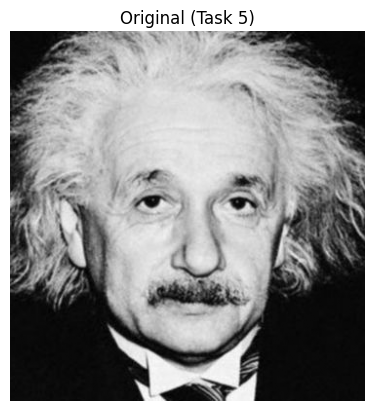

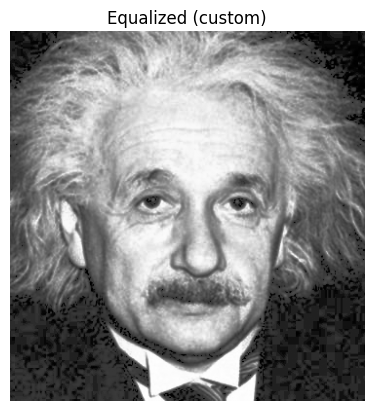

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6464\3820920036.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.figure(); plt.title('Before'); plt.hist(g.ravel(), 256, (0,255)); plt.show()


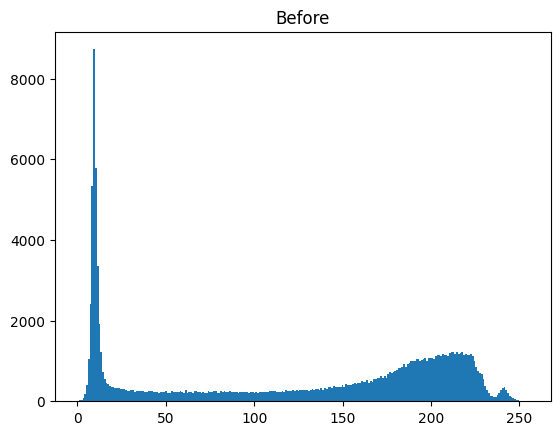

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6464\3820920036.py:7: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.figure(); plt.title('After'); plt.hist(eq.ravel(), 256, (0,255)); plt.show()


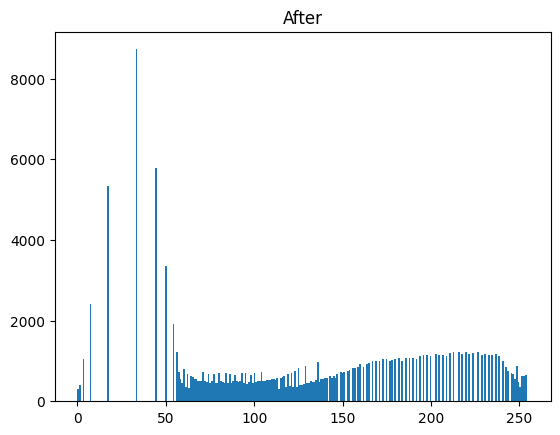

In [29]:
img5_path = RAW / 'einstein.png'  # <-- change to actual filename
g = imread_gray(str(img5_path))
eq, hist, cdf = hist_equalize_custom(g)
show_gray(g, 'Original (Task 5)')
show_gray(eq, 'Equalized (custom)')
plt.figure(); plt.title('Before'); plt.hist(g.ravel(), 256, (0,255)); plt.show()
plt.figure(); plt.title('After'); plt.hist(eq.ravel(), 256, (0,255)); plt.show()
save_image_gray(str(PROC / 'task5_out.png'), eq)

## Task 6 – Foreground-only histogram equalization (HSV-based mask)

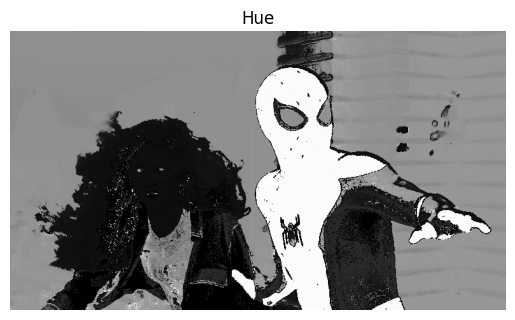

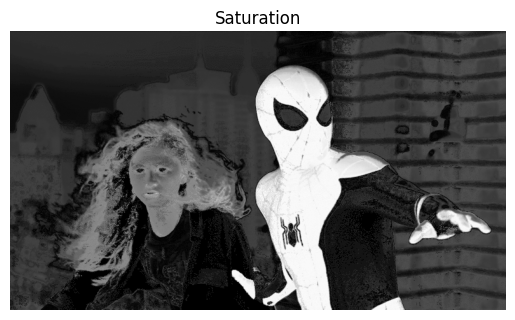

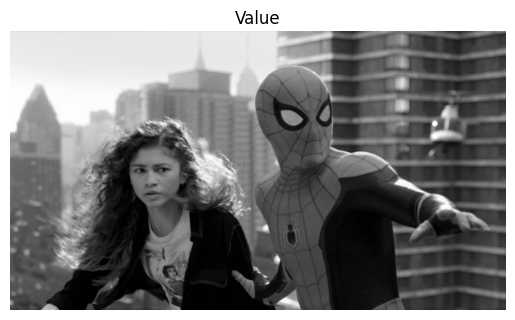

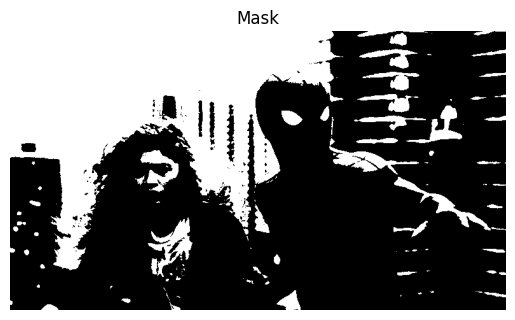

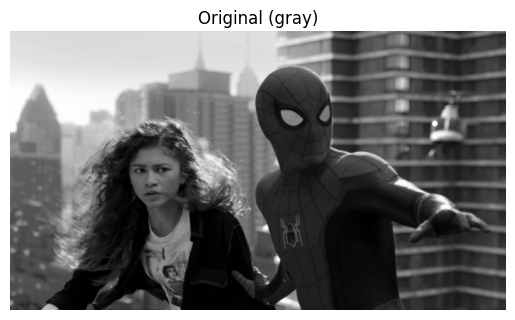

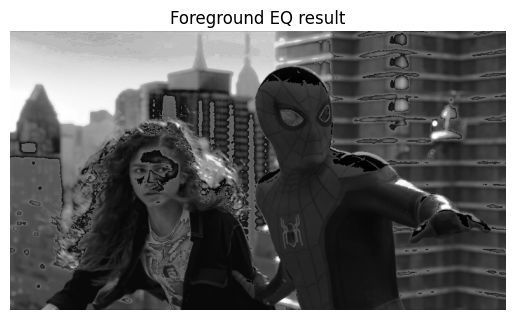

In [30]:
img6_path = RAW / 'spider.png'  # <-- change filename
img6 = imread_color(str(img6_path))
hsv = cv2.cvtColor(img6, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)
show_gray(h, 'Hue'); show_gray(s, 'Saturation'); show_gray(v, 'Value')

# Threshold on chosen plane (example uses V):
th = 0  # TODO: set suitable thresholding strategy
_, mask = cv2.threshold(v, 0, 255, cv2.THRESH_OTSU)
show_gray(mask, 'Mask')

fg = cv2.bitwise_and(cv2.cvtColor(img6, cv2.COLOR_RGB2GRAY), cv2.cvtColor(img6, cv2.COLOR_RGB2GRAY), mask=mask)
eq_fg, _, _ = hist_equalize_custom(fg)

bg_mask = cv2.bitwise_not(mask)
bg = cv2.bitwise_and(cv2.cvtColor(img6, cv2.COLOR_RGB2GRAY), cv2.cvtColor(img6, cv2.COLOR_RGB2GRAY), mask=bg_mask)
merged = cv2.add(eq_fg, bg)
show_gray(cv2.cvtColor(img6, cv2.COLOR_RGB2GRAY), 'Original (gray)')
show_gray(merged, 'Foreground EQ result')
save_image_gray(str(PROC / 'task6_out.png'), merged)

## Task 7 – Sobel filtering (filter2D, manual, separable)

## Task 8 – Zooming (nearest & bilinear) + SSD test

## Task 9 – GrabCut + blurred background